<a href="https://colab.research.google.com/github/dequiroz/1MTR53_RobIA/blob/main/NewtonRaphson_2DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1FsTa2YzWwxY-HBkd2EOXAlkPJ1zpikWv" alt="drawing" width="150"/>


<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1VBn7nKlruxCPLHH_UuD8B2pkvKP7JLRd" alt="drawing" width="800"/>


</br>

<img src="https://drive.google.com/uc?export=view&id=1tpg1CJh4or-VMrY-Qip25hgedgwy1Y8-" alt="drawing" width="800"/>
</p>


#Newton-Raphson para Cinemática Inversa en robots manipuladores
* Diego Quiroz Velasquez
* Pontificia Universidad Católica del Perú
* Sección Ingeniería Mecatrónica


---
Este archivo describe ...

<img src="https://drive.google.com/uc?export=view&id=1vgFoFHEKMN0WcAFlKS2hPMg2KuBm3sp9" alt="drawing"/>



In [27]:
# @title Historial de versiones
"""
Historial de versiones:
v1.0 - 2025-03-01 - Version Inicial (Rodrigo Carabajal)
v1.1 - 2025-04-27 - Dar formato del curso (Diego Quiroz)
                    Limpiar y reordenar código.
"""

'\nHistorial de versiones:\nv1.0 - 2025-03-01 - Version Inicial (Rodrigo Carabajal)\nv1.1 - 2025-04-27 - Dar formato del curso (Diego Quiroz)\n                    Limpiar y reordenar código.\n'

##MÉTODO NEWTON - RAPHSON Aplicado a brazo robot de 2GDL

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# =============================================================================
# Se define la función para calcular la cinemática directa del manipulador de
# 2 grados de libertad RR
# =============================================================================
def cinematica_directa_2DOF(q, L):
    '''
    Aplica cinemática directa para calcular la posición del efector final para
    un robot manipulador de 2 grados de libertad, dado los ángulos de articulación

    Parámetros:
       q (np.array): ángulo de giro de cada articulación en radianes [q1, q2]
       L (np.array): dimensiones de los eslabones [l1, l2]

    Retorna:
       np.array: Coordenadas [x, y] de la posición del efector final
    '''

    x = L[0] * np.cos(q[0]) + L[1] * np.cos(q[0] + q[1])
    y = L[0] * np.sin(q[0]) + L[1] * np.sin(q[0] + q[1])

    return np.array([x, y])

In [3]:
# =============================================================================
# Se define la función para calcular el jacobiano del manipulador de 2 grados
# de libertad RR
# =============================================================================
def jacobiano_2DOF(q, L):
  '''
  Calcula el jacobiano del brazo planar de 2GDL

  Parámetros:
      q (np.array): ángulo de giro de cada articulación en radianes [q1, q2]
      L (np.array): dimensiones de los eslabones [l1, l2]

  Retorna:
      Una matriz 2x2 que representa el Jacobiano del robot.
  '''
  l1 = L[0]
  l2 = L[1]
  q1 = q[0]
  q2 = q[1]
  J = np.array([[-l1 * np.sin(q1) - l2 * np.sin(q1 + q2), -l2 * np.sin(q1 + q2)],
                [l1 * np.cos(q1) + l2 * np.cos(q1 + q2), l2 * np.cos(q1 + q2)]])
  return J

In [4]:
def constraints(q):
    """Ajusta los ángulos para que estén en el rango [-pi, pi]"""
    return np.mod(q + np.pi, 2 * np.pi) - np.pi

In [20]:
# =============================================================================
# Función de Cinemática Inversa para un manipulador de 2 grados de libertad RR
# Emplea el método de Newton-Raphson
# =============================================================================
def IK_NR_2DOF(x_deseado, q_inicial, L, max_iteraciones=100, epsilon=1e-6):
  '''
  Resuelve la Cinemática Inversa usando Newton-Raphson con restricciones en los
  ángulos para un robot planar de 2GDL
  '''
  q = np.array(q_inicial)

  for i in range(max_iteraciones):
    x_actual = cinematica_directa_2DOF(q, L)
    error = x_deseado - x_actual

    if np.linalg.norm(error) < epsilon:  # Convergencia
      print("Solución encontrada en", i, "iteraciones")
      return q  # Devuelve los ángulos y el número de iteraciones

    J = jacobiano_2DOF(q, L)
    #J_inv = np.linalg.inv(J)  # Inversa del jacobiano
    J_inv = np.linalg.pinv(J)  # Pseudoinversa del jacobiano
    q = q + J_inv @ error  # Actualización de Newton-Raphson

    # Aplicar restricciones de ángulo (-pi a pi)
    q = constraints(q)

  print("No convergió en", max_iteraciones, "iteraciones")
  return q

In [24]:
# Parámetros del robot de 2 grados de libertad (2DOF)
longitudes_eslabones = [1, 1]  # Longitudes de los eslabones del robot
estimacion_inicial_deg = [10, 10]  # Estimación inicial en grados
posicion_objetivo = np.array([0.5, 0.5])  # Posición deseada del efector final

# Conversión de la estimación inicial a radianes
estimacion_inicial_rad = np.deg2rad(estimacion_inicial_deg)

# Cálculo de la solución de la cinemática inversa
solucion_q = IK_NR_2DOF(posicion_objetivo, estimacion_inicial_rad, longitudes_eslabones)

# Cálculo de la posición alcanzada mediante cinemática directa
posicion_alcanzada = cinematica_directa_2DOF(solucion_q, longitudes_eslabones)

print(f"La posicion alcanzada fue: {posicion_alcanzada}")
print(f"Ángulo q1 = {np.rad2deg(solucion_q[0]):.2f}°")
print(f"Ángulo q2 = {np.rad2deg(solucion_q[1]):.2f}°")

Solución encontrada en 7 iteraciones
La posicion alcanzada fue: [0.5        0.49999999]
Ángulo q1 = -24.30°
Ángulo q2 = 138.59°


GRAFICAR LA SOLUCIÓN

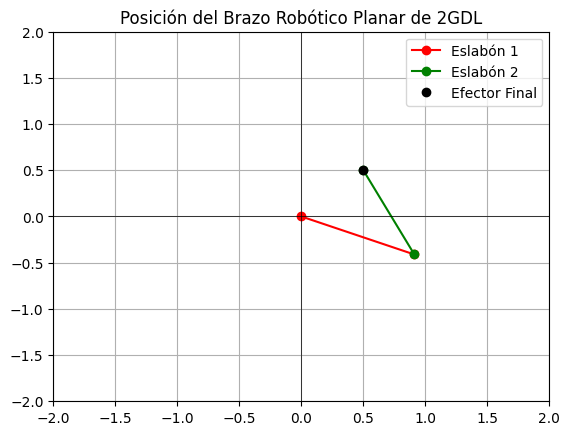

In [26]:
# Función para visualizar el robot 2DOF
def plot_robot_2DOF(q, L):
    """Visualiza el brazo robótico de 2DOF en 2D"""
    # Calculamos las posiciones de los eslabones con los ángulos
    x0, y0 = 0, 0  # Origen (base del brazo)
    x1 = L[0] * np.cos(q[0])
    y1 = L[0] * np.sin(q[0])
    x2 = x1 + L[1] * np.cos(q[0] + q[1])
    y2 = y1 + L[1] * np.sin(q[0] + q[1])

    # Dibujar el brazo robótico
    plt.figure()
    plt.plot([x0, x1], [y0, y1], 'ro-', label='Eslabón 1')  # graficar el eslabón 1
    plt.plot([x1, x2], [y1, y2], 'go-', label='Eslabón 2')  # graficar el eslabón 2
    plt.plot(x2, y2, 'ko', label='Efector Final')  # Efector final
    plt.xlim(-np.sum(L), np.sum(L))
    plt.ylim(-np.sum(L), np.sum(L))
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Posición del Brazo Robótico Planar de 2GDL')
    plt.show()

# Visualizar el brazo con la solución obtenida
plot_robot_2DOF(solucion_q, longitudes_eslabones)

##MÉTODO NEWTON - RAPHSON Aplicado a brazo robot de 3GDL

In [29]:
# =============================================================================
# Se define la función para calcular la cinemática directa del manipulador de
# 3 grados de libertad RRR
# =============================================================================
def cinematica_directa_3DOF(q, L):
    '''
    Aplica cinemática directa para calcular la posición del efector final para
    un robot manipulador de 3 grados de libertad, dado los ángulos de articulación

    Parámetros:
       q (np.array): ángulo de giro de cada articulación en radianes [q1, q2, q3]
       L (np.array): dimensiones de los eslabones [l1, l2, l3]

    Retorna:
       np.array: Coordenadas [x, y] de la posición del efector final
    '''

    x = L[0] * np.cos(q[0]) + L[1] * np.cos(q[0] + q[1]) + L[2] * np.cos(q[0] + q[1] + q[2])
    y = L[0] * np.sin(q[0]) + L[1] * np.sin(q[0] + q[1]) + L[2] * np.sin(q[0] + q[1] + q[2])

    return np.array([x, y])

In [28]:
# =============================================================================
# Se define la función para calcular el jacobiano del manipulador de 3 grados
# de libertad RRR
# =============================================================================
def jacobiano_3DOF(q, L):
  '''
  Calcula el jacobiano del brazo planar de 3GDL

  Parámetros:
      q (np.array): ángulo de giro de cada articulación en radianes [q1, q2, q3]
      L (np.array): dimensiones de los eslabones [l1, l2, l3]

  Retorna:
      Una matriz 3x3 que representa el Jacobiano del robot.
  '''
  q1, q2, q3 = q
  L1, L2, L3 = L
  # Precalcular sumas de ángulos
  q12 = q1 + q2
  q123 = q12 + q3

  # Cálculo del Jacobiano
  J = np.array([
        [-L1 * np.sin(q1) - L2 * np.sin(q12) - L3 * np.sin(q123),
         -L2 * np.sin(q12) - L3 * np.sin(q123),
         -L3 * np.sin(q123)],

        [L1 * np.cos(q1) + L2 * np.cos(q12) + L3 * np.cos(q123),
         L2 * np.cos(q12) + L3 * np.cos(q123),
         L3 * np.cos(q123)]
    ])
  return J

In [30]:
def IK_NR_3DOF(x_deseado, q_inicial, L, max_iteraciones=100, epsilon=1e-6):
    """Resuelve la Cinemática Inversa usando Newton-Raphson con restricciones en los ángulos (2DOF)"""

    q = np.array(q_inicial)

    for i in range(max_iteraciones):
        x_actual = cinematica_directa_3DOF(q, L)
        error = x_deseado - x_actual

        if np.linalg.norm(error) < epsilon:  # Convergencia
            print("Solución encontrada en", i, "iteraciones")
            return q  # Devuelve los ángulos y el número de iteraciones

        J = jacobiano_3DOF(q, L)
        #J_inv = np.linalg.inv(J)
        J_inv = np.linalg.pinv(J) # Pseudoinversa del jacobiano
        q += J_inv @ error  # Actualización de Newton-Raphson

        # Aplicar restricciones de ángulo (-pi a pi)
        q = constraints(q)

    print("No convergió en", max_iteraciones, "iteraciones")
    return q

In [35]:
# Parámetros del robot de 3 grados de libertad (3DOF)
longitudes_eslabones = [1, 1, 1]  # Longitudes de los eslabones del robot
estimacion_inicial_deg = [10, 10, 10]  # Estimación inicial en grados
posicion_objetivo = np.array([0.5, 2.1])  # Posición deseada del efector final

# Conversión de la estimación inicial a radianes
estimacion_inicial_rad = np.deg2rad(estimacion_inicial_deg)

# Cálculo de la solución de la cinemática inversa
solucion_q = IK_NR_3DOF(posicion_objetivo, estimacion_inicial_rad, longitudes_eslabones)

# Cálculo de la posición alcanzada mediante cinemática directa
posicion_alcanzada = cinematica_directa_3DOF(solucion_q, longitudes_eslabones)

print(f"La posicion alcanzada fue: {posicion_alcanzada}")
print(f"Ángulo q1 = {np.rad2deg(solucion_q[0]):.2f}°")
print(f"Ángulo q2 = {np.rad2deg(solucion_q[1]):.2f}°")
print(f"Ángulo q3 = {np.rad2deg(solucion_q[2]):.2f}°")

Solución encontrada en 5 iteraciones
La posicion alcanzada fue: [0.50000001 2.09999999]
Ángulo q1 = 143.45°
Ángulo q2 = -88.79°
Ángulo q3 = -11.13°


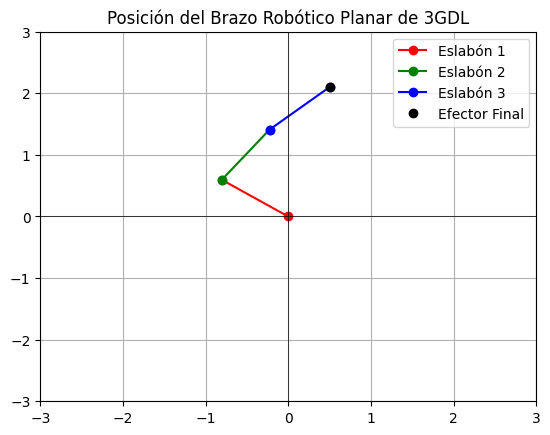

In [38]:
def plot_robot(q, L):
    """Visualiza el brazo robótico en 2D"""
    # Calculamos las posiciones de los eslabones
    x0, y0 = 0, 0  # Origen (base del brazo)
    x1 = L[0] * np.cos(q[0])
    y1 = L[0] * np.sin(q[0])
    x2 = x1 + L[1] * np.cos(q[0] + q[1])
    y2 = y1 + L[1] * np.sin(q[0] + q[1])
    x3 = x2 + L[2] * np.cos(q[0] + q[1] + q[2])
    y3 = y2 + L[2] * np.sin(q[0] + q[1] + q[2])

    # Dibujar el brazo robótico
    plt.figure()
    plt.plot([x0, x1], [y0, y1], 'ro-', label='Eslabón 1')  # Eslabón 1
    plt.plot([x1, x2], [y1, y2], 'go-', label='Eslabón 2')  # Eslabón 2
    plt.plot([x2, x3], [y2, y3], 'bo-', label='Eslabón 3')  # Eslabón 3
    plt.plot(x3, y3, 'ko', label='Efector Final')  # Efector final
    plt.xlim(-np.sum(L), np.sum(L))
    plt.ylim(-np.sum(L), np.sum(L))
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Posición del Brazo Robótico Planar de 3GDL')
    plt.show()

# Visualizar el brazo con la solución obtenida
plot_robot(solucion_q, longitudes_eslabones)